In [1]:
# 元ファイルはfig1_a_b_execution.ipynb

import pandas as pd
import numpy as np
import pickle
import json
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.dates as mdates
import matplotlib.colorbar as mcolorbar
from matplotlib import colormaps
from matplotlib.colors import ListedColormap
from matplotlib.colors import hsv_to_rgb
import seaborn as sns
import itertools
from itertools import combinations
from collections import Counter
from tqdm import tqdm

import networkx as nx
import igraph as ig
import leidenalg

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans

In [2]:
import pandas as pd
import numpy as np

# --- 基本設定 ---
start_year = 2005
end_year   = 2019
genres = ["k-pop", "djent", "new_rave", "trap", "j-pop", "chillwave"]

In [4]:
df_ratio = pd.read_pickle("./fig1_a_b_intermediate/df_ratio.pkl")

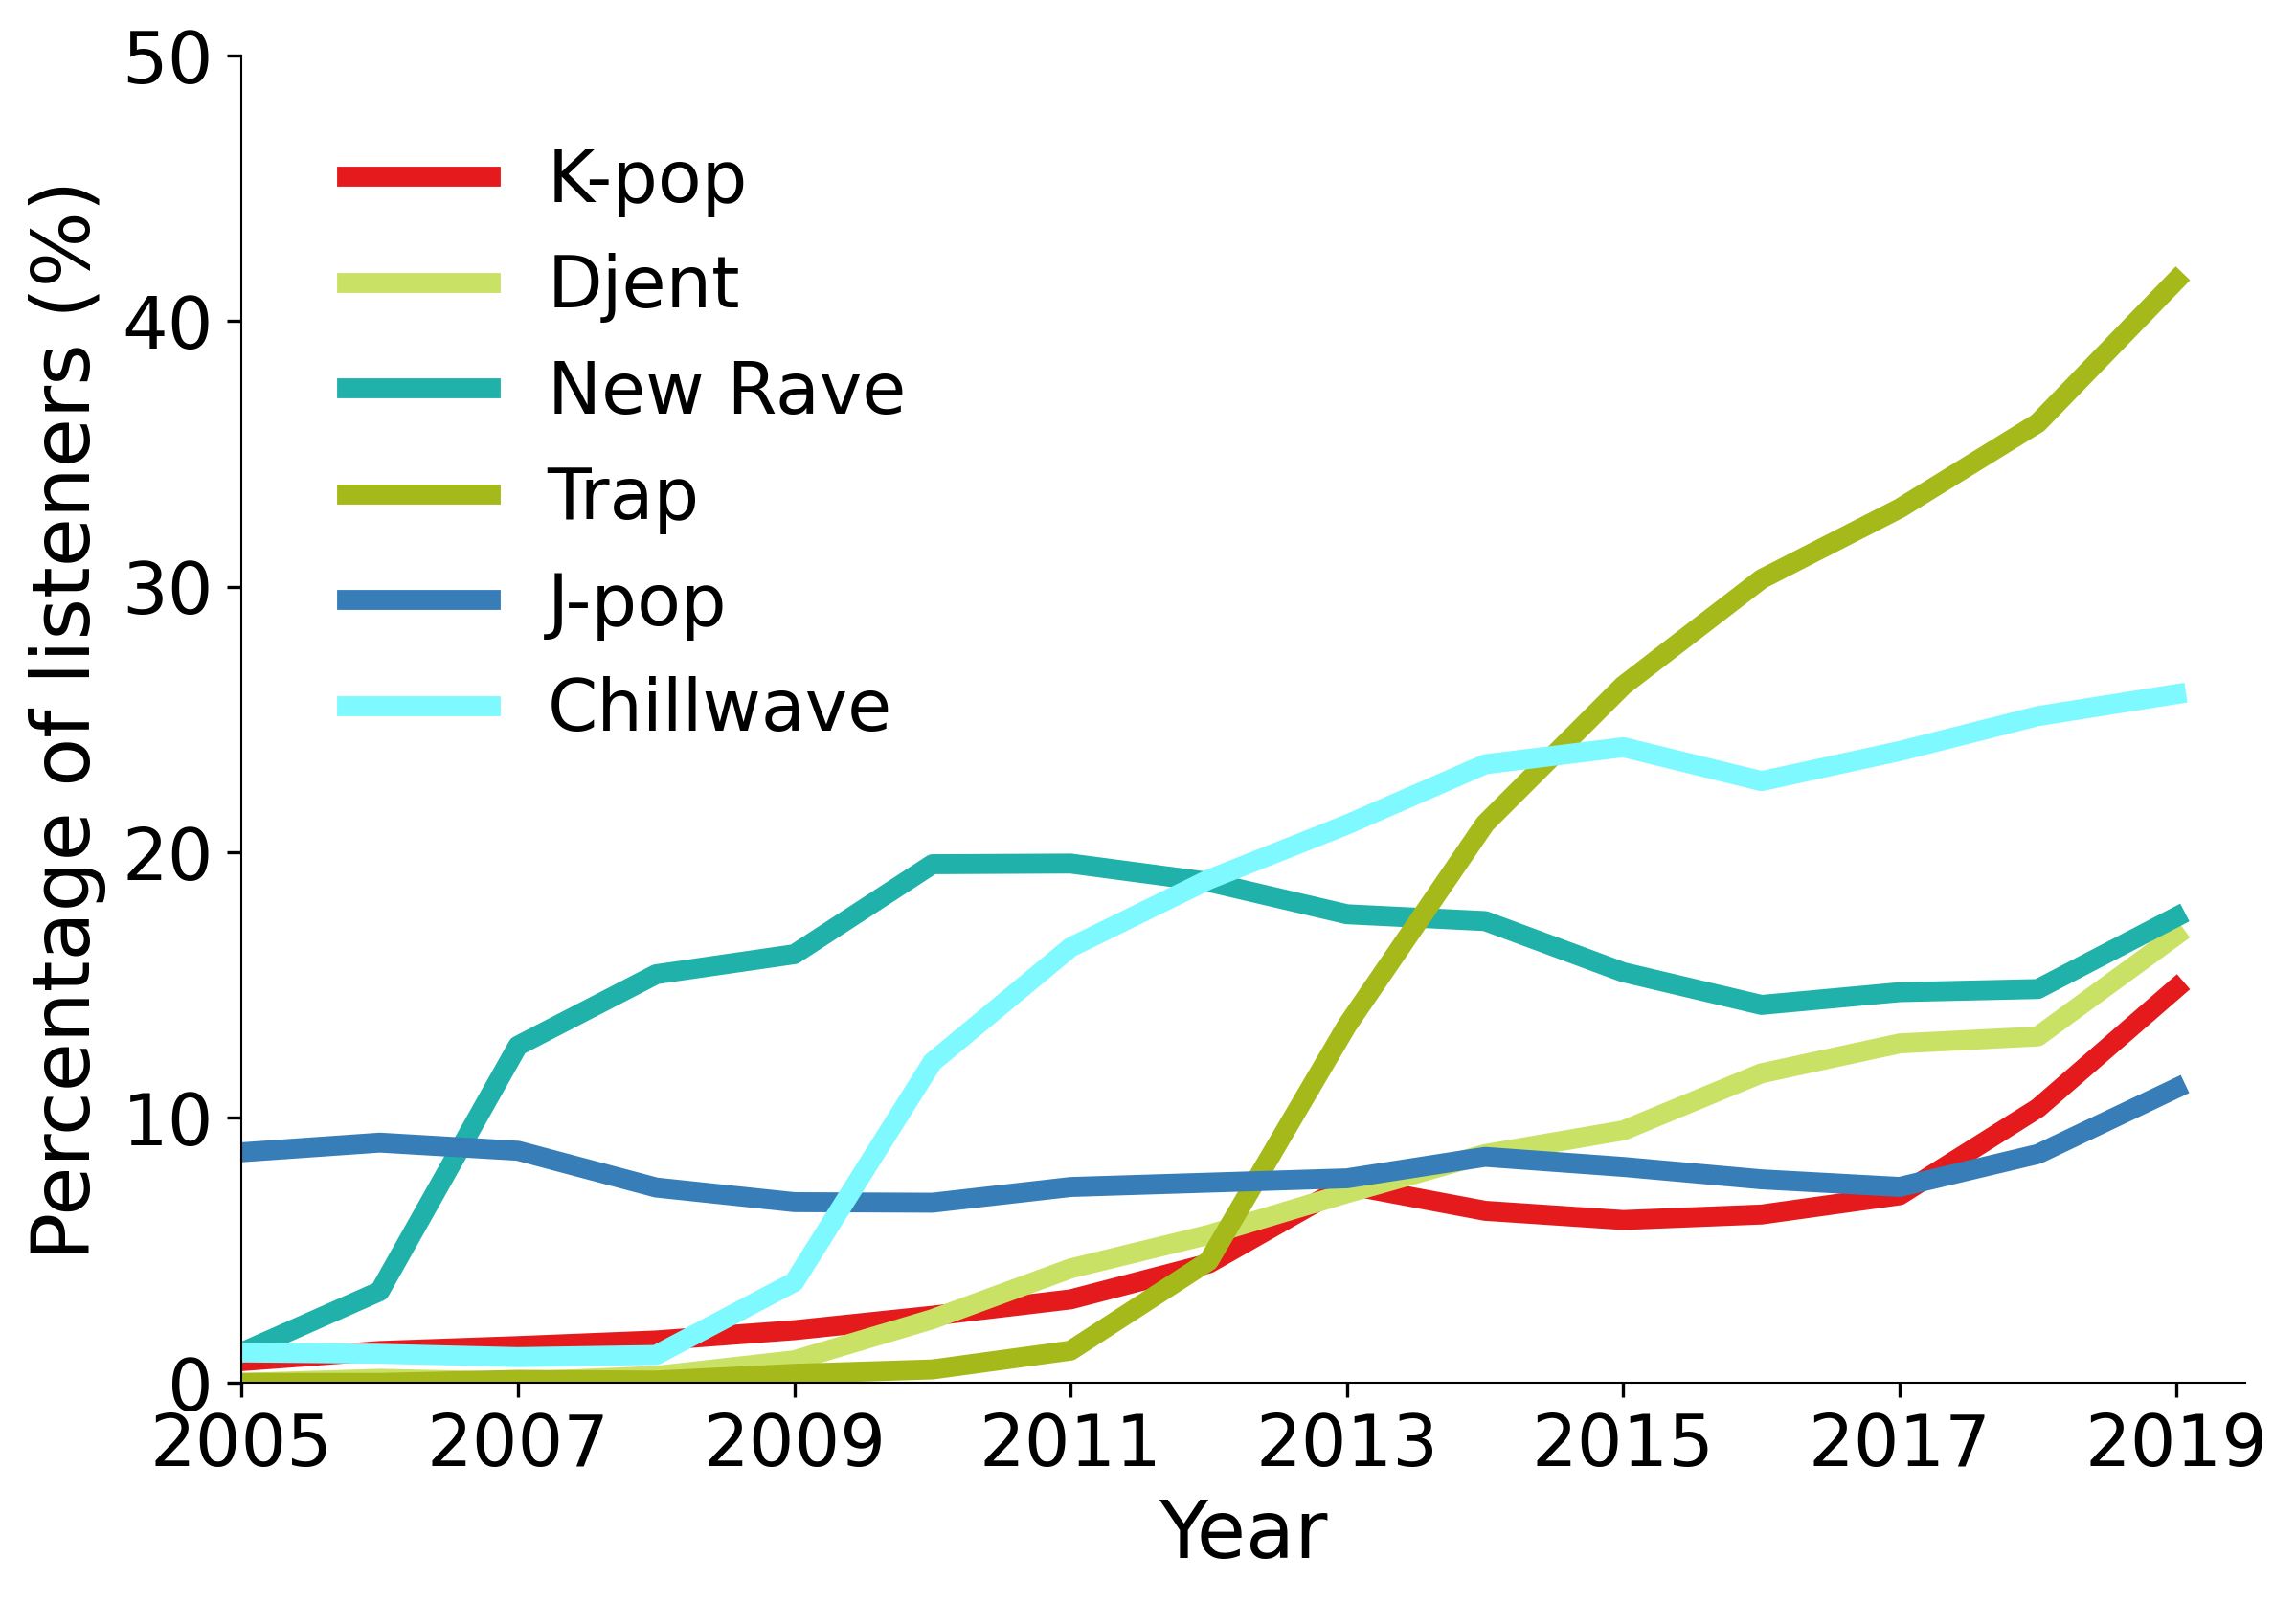

In [5]:
import matplotlib.pyplot as plt
import scienceplots

# --- 凡例の名前変換用の辞書 ---
legend_name_map = {
    "k-pop": "K-pop",
    "korean_pop": "Korean pop",
    "j-pop": "J-pop",
    "pop": "Pop",
    "rock": "Rock",
    "rap": "Rap",
    "new_rave": "New Rave",
    "chillwave": "Chillwave",
    "trap": "Trap",
    "djent": "Djent",
    # ... 必要に応じて追加
}

# --- カラーマップ（指定色を使用） ---
tag_color_map = {
    "k-pop": "#e41a1c",
    "korean_pop": "#b22222",
    "j-pop": "#377eb8",
    'pop': '#2ca02c',
    "rock": "#d62728",
    "rap": "#bcbd22",
    "other": "#aaaaaa",
    "anime": "#66c2a5",
    "j-rock": "#8da0cb",
    "soundtrack": "#a6d854",
    "visual_kei": "#ffd92f",
    "boy_band": "#f46d43",
    "girl_group": "#e78ac3",
    'Ambient': '#a6cee3',
    'Punk': '#fdbf6f',
    'Rock': '#d4a6c8',
    'Progressive Metal': '#ffff99',
    'Metalcore': '#b2df8a',
    'Indie Rock': '#fb9a99',
    'Black Metal': '#1f78b4',
    'Rap': '#bcbd22',
    'Metal': '#f0e442',
    "djent": "#c9e265",
    "trap": "#a6b91a",
    "new_rave": "#20b2aa",
    "chillwave": "#7df9ff"
}

# --- スタイル設定 ---
plt.rcParams['figure.dpi'] = 300
plt.style.use(['nature'])
plt.rc('font', size=9)
plt.rc('axes', titlesize=20, labelsize=20)
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rc('lines', linewidth=5)

# --- 描画 ---
fig, ax = plt.subplots(figsize=(9, 6))

for genre in genres:
    color = tag_color_map.get(genre, "#333333")  # 指定がなければグレー
    # 凡例名を辞書で変換（辞書に無いキーはそのまま genre を使う）
    label = legend_name_map.get(genre, genre)

    ax.plot(
        df_ratio['year'],
        df_ratio[genre] * 100,
        marker='o',
        linestyle='-',
        label=label,  # ← 変換後のラベル名を使用
        color=color
    )

ax.set_xlabel('Year')
ax.set_ylabel('Percentage of listeners (%)')
ax.set_ylim(0, 50)

# 軸装飾の調整
ax.spines[['right', 'top']].set_visible(False)
ax.tick_params(which='both', top=False, right=False)
ax.set_xticks(range(2005, 2020, 2))  # ← 2年ごとの目盛り
ax.set_xlim(2005, 2019.5)

# 凡例
ax.legend(
    loc='upper left',
    bbox_to_anchor=(0.02, 0.98),  # グラフ内左上に配置
    fontsize=18,
    frameon=False
)

# plt.savefig("niche_user_percentage.pdf", dpi=300, bbox_inches='tight')
# plt.savefig("niche_user_percentage.eps", dpi=300, bbox_inches='tight')
plt.show()